In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

df = pd.read_csv("train.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

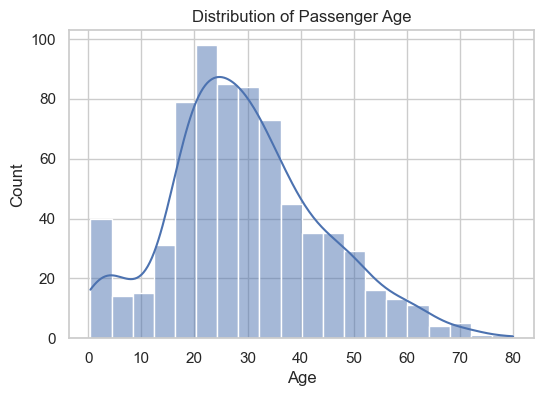

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Distribution of Passenger Age")
plt.show()


Most passengers are between 20-40 years old, and the distribution is slightly right-skewed.

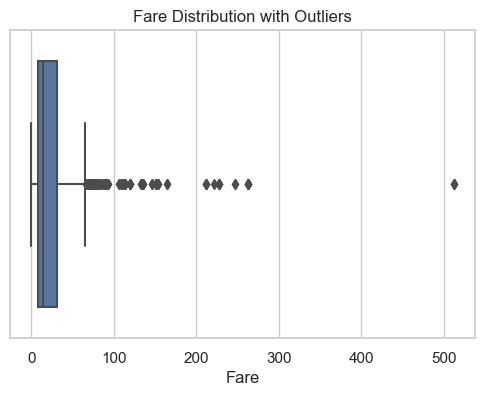

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()


There are many outliers, showing some passengers paid very high fares.

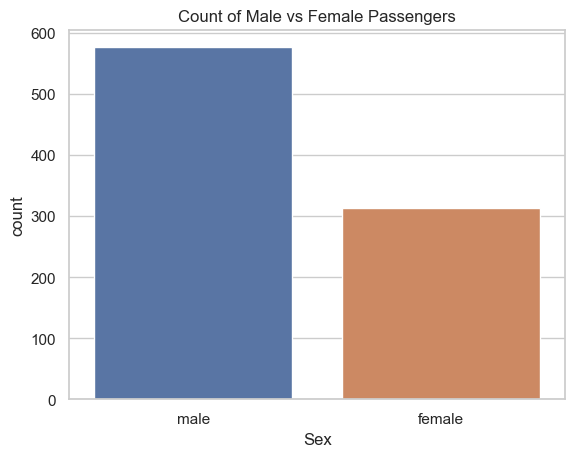

In [5]:
sns.countplot(x='Sex', data=df)
plt.title("Count of Male vs Female Passengers")
plt.show()


In [ ]:
There are more male passengers than female passengers.

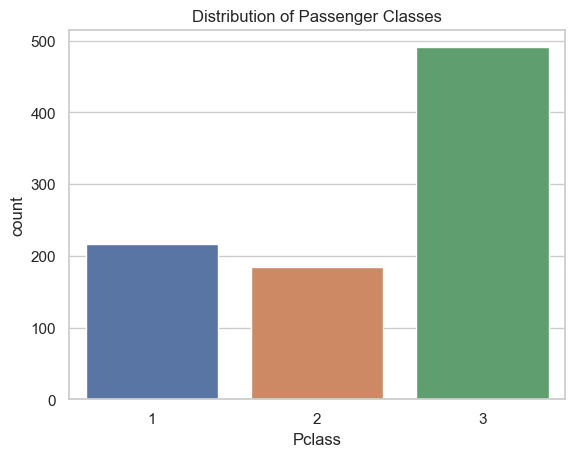

In [6]:
sns.countplot(x='Pclass', data=df)
plt.title("Distribution of Passenger Classes")
plt.show()


Most passengers are from Pclass 3 (economy class).

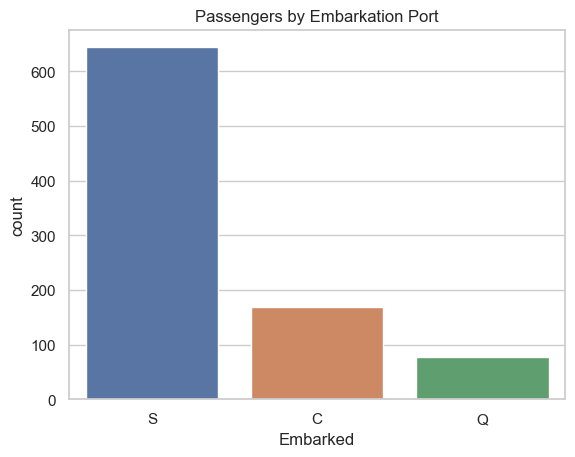

In [7]:
sns.countplot(x='Embarked', data=df)
plt.title("Passengers by Embarkation Port")
plt.show()


Most passengers boarded from Southampton (S)

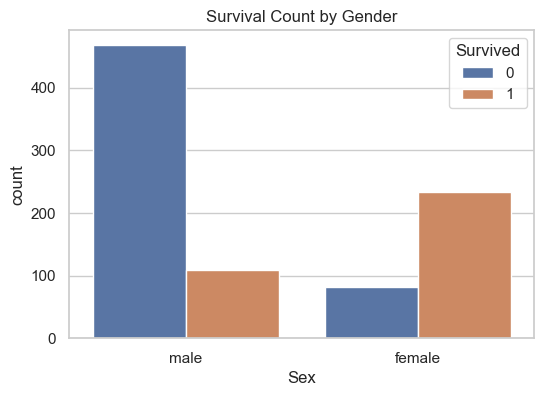

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()


Females had a significantly higher survival rate than males

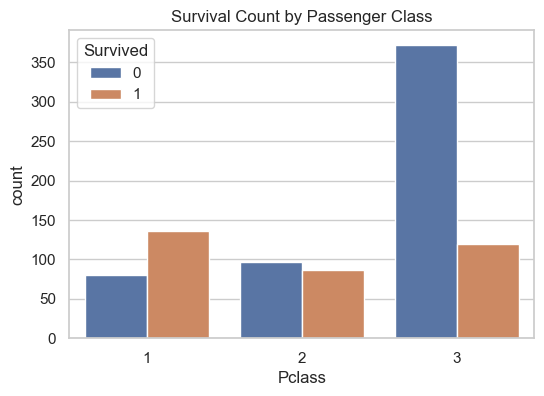

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


Passengers in 1st class survived more than those in 2nd and 3rd class.

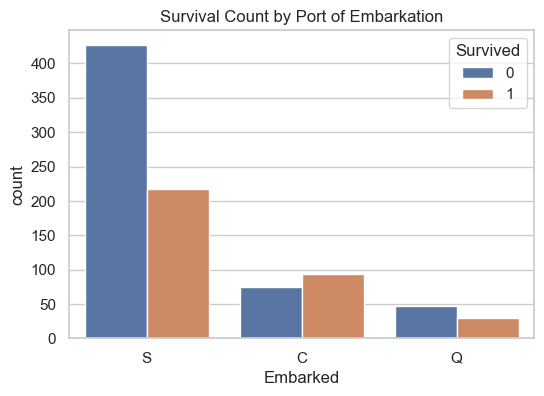

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Count by Port of Embarkation")
plt.show()


Passengers from Cherbourg (C) had better survival rates than other ports.

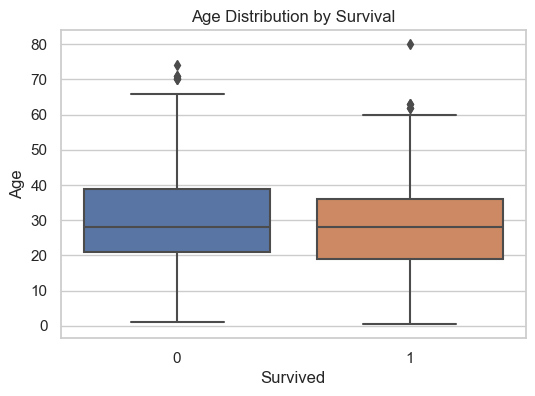

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


Younger passengers had higher survival chances compared to older ones.

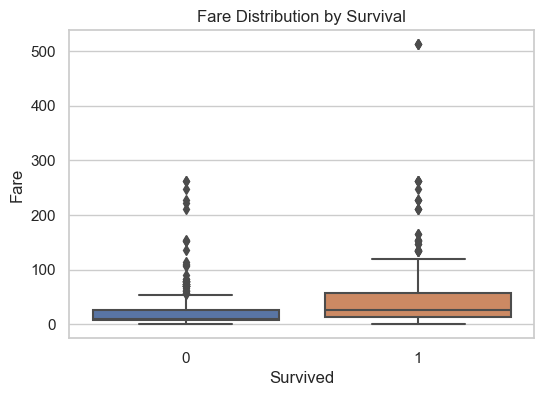

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()


Survivors paid higher fares on average, possibly due to higher-class cabins.

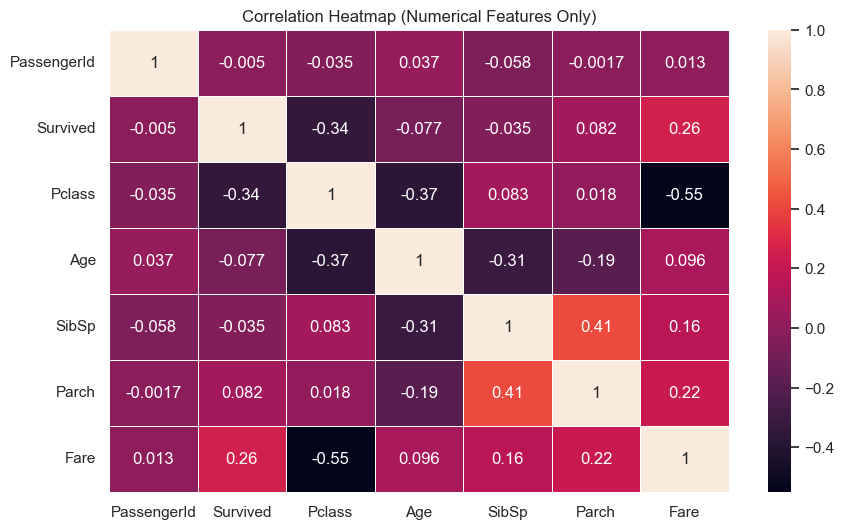

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()



- Survived is positively correlated with Fare.
- Pclass is negatively correlated with Survival (higher class → higher chance to survive).
- Age has a weak negative correlation with Survival.
- SibSp and Parch show very weak correlation.

In [20]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)



In [21]:
df['Title'] = df['Name'].str.extract(',\s*([^\.]+)\.')

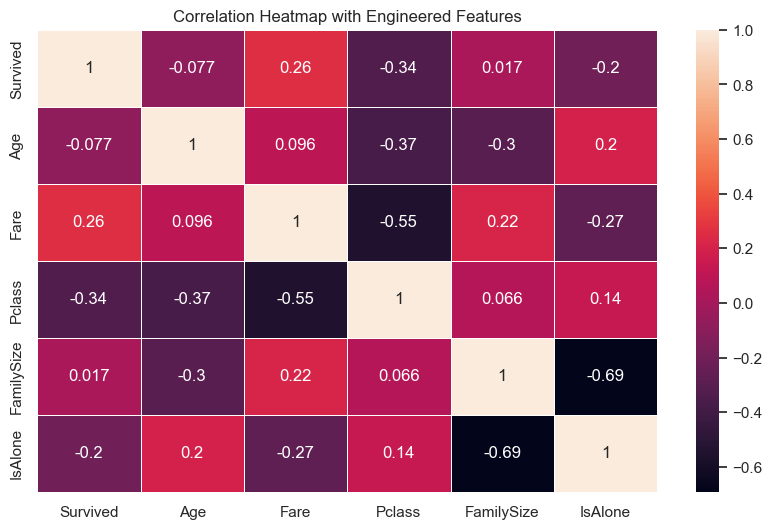

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Survived','Age','Fare','Pclass','FamilySize','IsAlone']].corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap with Engineered Features")
plt.show()


- FamilySize shows a small positive correlation with Survival.
- IsAlone is negatively correlated with Survival — passengers traveling alone had lower survival chances.
- Fare has strong positive correlation with Survival.

## 📌 Final Summary of Insights from EDA

🔹 **Demographic Insights:**
- Most passengers were between **20–40 years old**.
- There were **more male passengers** than females.
- Majority of passengers belonged to **3rd class (Pclass 3)**.

---

🔹 **Survival Related Insights:**
- **Females had a much higher survival rate** than males.
- **1st class passengers survived the most**, while 3rd class had the lowest survival rate.
- Passengers who paid **higher Fare had better chances of survival**, indicating higher-class cabins were safer.

---

🔹 **Feature Engineering Insights:**
- Passengers with **family members (FamilySize > 1)** had better survival chances.
- **Passengers traveling alone (IsAlone = 1)** had much lower survival rates.
- Extracted **Title** (Mr, Mrs, Miss) showed that **women and children** had better survival rates.

---

🔹 **Correlation Findings:**
- `Fare` shows a **strong positive correlation** with Survival.
- `Pclass` and `IsAlone` show a **negative correlation** with Survival.
- `Age` has a weak negative correlation — **younger passengers survived more**.

---

### 🎯 Overall Conclusion

Survival probability on Titanic was strongly influenced by:
👉 Gender (Females survived more)  
👉 Passenger Class (Higher class = Higher survival)  
👉 Fare (Higher Fare = Higher survival)  
👉 Family presence (IsAlone = Lowest survival rate)  

These insights help in understanding key survival patterns and identifying important features for predictive modeling.
